In [1]:
import pandas as pd
import pingouin as pg

#enter survey responses as a DataFrame
df_spark_utili = pd.DataFrame({
    'Q1': [7, 6, 4, 6],
    'Q2': [7, 6, 4, 6],
    'Q3': [7, 6, 4, 6],
    'Q4': [7, 6, 4, 6],
    'Q5': [7, 6, 4, 6],
    'Q6': [7, 6, 4, 7]})

print(pg.cronbach_alpha(data=df_spark_utili))

df_spark_ez = pd.DataFrame({
    'Q1': [7, 7, 4, 7],
    'Q2': [6, 7, 4, 6],
    'Q3': [7, 6, 4, 6],
    'Q4': [7, 7, 4, 6],
    'Q5': [7, 7, 4, 7],
    'Q6': [7, 6, 4, 6]})
print(pg.cronbach_alpha(data=df_spark_ez))

df_airbyte_utili = pd.DataFrame({
    'Q1': [4, 7, 4, 7],
    'Q2': [4, 7, 4, 6],
    'Q3': [4, 7, 4, 7],
    'Q4': [4, 7, 4, 6],
    'Q5': [4, 7, 4, 7],
    'Q6': [4, 7, 4, 7]})

print(pg.cronbach_alpha(data=df_airbyte_utili))

df_airbyte_ez = pd.DataFrame({
    'Q1': [4, 7, 4, 7],
    'Q2': [4, 5, 4, 6],
    'Q3': [4, 7, 4, 7],
    'Q4': [4, 7, 4, 5],
    'Q5': [4, 7, 4, 7],
    'Q6': [4, 7, 4, 7]})
print(pg.cronbach_alpha(data=df_airbyte_ez))

(0.9957081545064377, array([0.982, 1.   ]))
(0.9854304635761588, array([0.939, 0.999]))
(0.9958762886597937, array([0.983, 1.   ]))
(0.9769470404984423, array([0.904, 0.998]))


In [2]:
result = pd.DataFrame(columns=["Framework", "Teste", "Chronbach’s Alpha"])
result.loc[0] = ["Airflow + Spark", "Utilidade Percebida", 0.9957081545064377]
result.loc[1] = ["Airflow + Spark", "Facilidade de uso percebida", 0.9854304635761588]
result.loc[2] = ["Airbyte", "Utilidade Percebida", 0.9958762886597937]
result.loc[3] = ["Airbyte", "Facilidade de uso percebida", 0.9769470404984423]
result.head()

,Framework,Teste,Chronbach’s Alpha
0,Airflow + Spark,Utilidade Percebida,0.995708
1,Airflow + Spark,Facilidade de uso percebida,0.985430
2,Airbyte,Utilidade Percebida,0.995876
3,Airbyte,Facilidade de uso percebida,0.976947


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame()

df_spark_utili["framework"] = "Airflow + Spark"
df_spark_utili["teste"] = "Utilidade percebida"
df_spark_ez["framework"] = "Airflow + Spark"
df_spark_ez["teste"] = "Facilidade percebida"
df_airbyte_utili["framework"] = "Airbyte"
df_airbyte_utili["teste"] = "Utilidade percebida"
df_airbyte_ez["framework"] = "Airbyte"
df_airbyte_ez["teste"] = "Facilidade percebida"

df = pd.concat([df_spark_utili, df_spark_ez, df_airbyte_utili, df_airbyte_ez])
df


,Q1,Q2,Q3,Q4,Q5,Q6,framework,teste
0,7,7,7,7,7,7,Airflow + Spark,Utilidade percebida
1,6,6,6,6,6,6,Airflow + Spark,Utilidade percebida
2,4,4,4,4,4,4,Airflow + Spark,Utilidade percebida
3,6,6,6,6,6,7,Airflow + Spark,Utilidade percebida
0,7,6,7,7,7,7,Airflow + Spark,Facilidade percebida
1,7,7,6,7,7,6,Airflow + Spark,Facilidade percebida
2,4,4,4,4,4,4,Airflow + Spark,Facilidade percebida
3,7,6,6,6,7,6,Airflow + Spark,Facilidade percebida
0,4,4,4,4,4,4,Airbyte,Utilidade percebida
1,7,7,7,7,7,7,Airbyte,Utilidade percebida


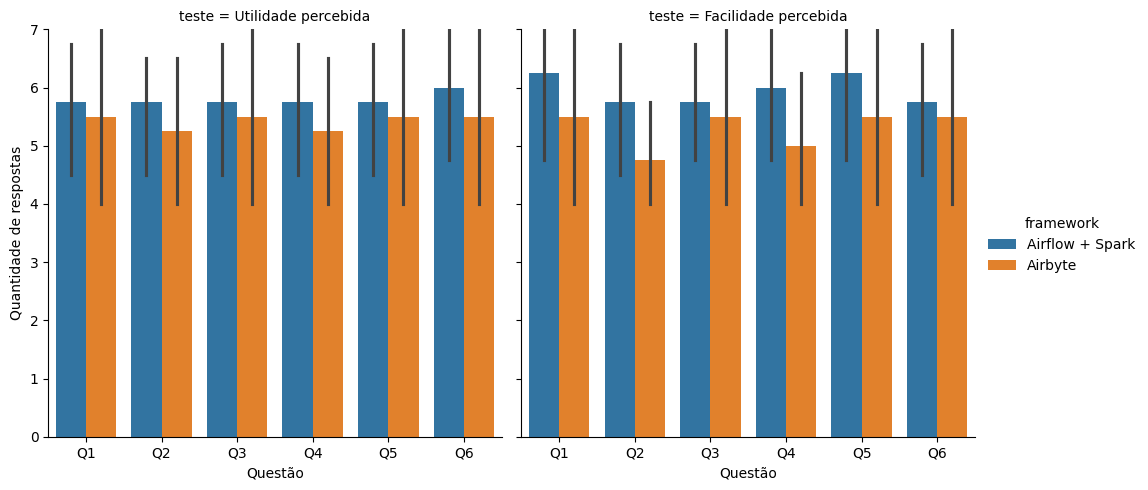

In [31]:
df_melted = df.melt(id_vars=["framework", "teste"], var_name="questao", value_name="resposta")
sns.catplot(data=df_melted, kind="bar", col="teste", hue="framework", x="questao", y="resposta").set(ylim=(0, 7),
                            xlabel="Questão", ylabel="Quantidade de respostas")


plt.savefig("perguntas.svg")
plt.show()